In [1]:
import os
import sys
from pathlib import Path


sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from load_data import load_data
plt.style.use('ggplot')

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

In [4]:
df = load_data()

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# Average Daily Offenses

/home/anders/miniconda3/envs/viz_landscape/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


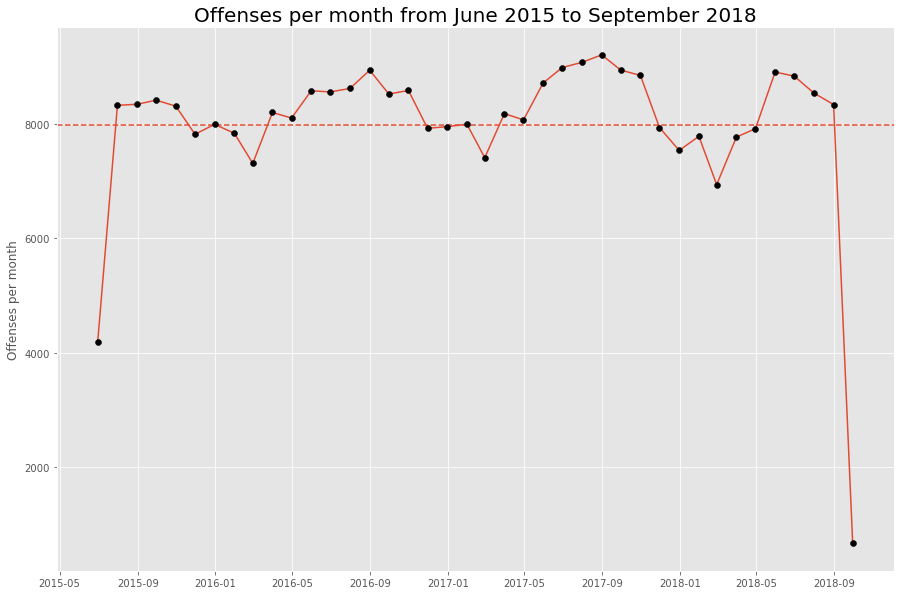

In [6]:
fig, ax = plt.subplots()
def plot_average_daily_offenses(ax):
    num_crimes_over_time = df.resample('M', on='OCCURRED_ON_DATE')['INCIDENT_NUMBER'].count().rename('number_of_crimes')
    ax.plot(num_crimes_over_time.index, num_crimes_over_time.values)
    ax.scatter(num_crimes_over_time.index, num_crimes_over_time.values, color='black', zorder=3)
    ax.axhline(num_crimes_over_time.mean(), ls='--')
    ax.set_title(f"Offenses per month from "
                 f"{num_crimes_over_time.index.min().strftime('%B %Y')} to "
                 f"{num_crimes_over_time.index.max().strftime('%B %Y')}", 
                 fontsize=20);
    ax.set_ylabel('Offenses per month');
    return ax
plot_average_daily_offenses(ax);

# Average Daily shootings per month

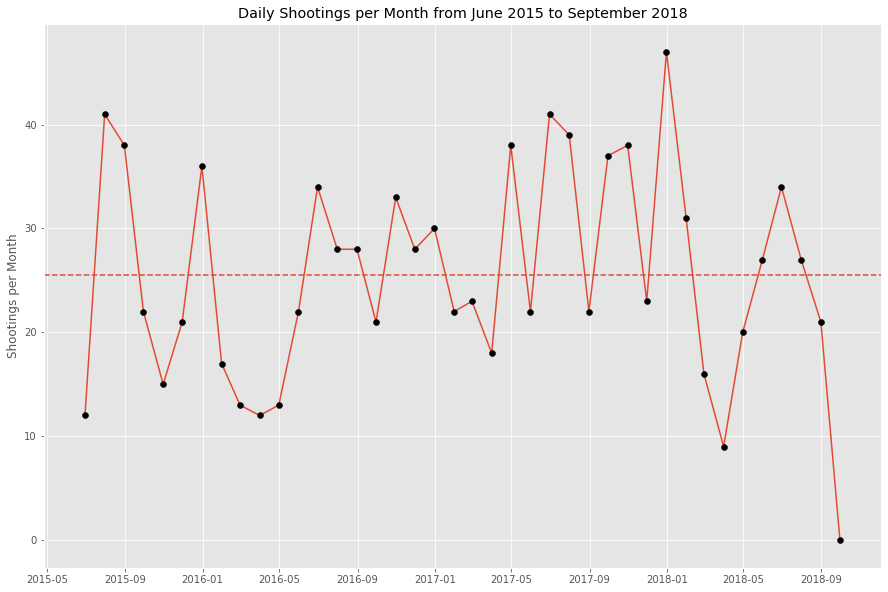

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
def plot_avg_shootings_per_day(ax):
    avg_shootings_per_month = df.resample('M', on='OCCURRED_ON_DATE')['SHOOTING'].sum()
    ax.plot(avg_shootings_per_month.index, avg_shootings_per_month.values)
    ax.scatter(avg_shootings_per_month.index, avg_shootings_per_month.values, color='black', zorder=3)
    ax.axhline(avg_shootings_per_month.mean(), ls='--')
    ax.set_title(f"Daily Shootings per Month from "
                 f"{avg_shootings_per_month.index.min().strftime('%B %Y')} to "
                 f"{avg_shootings_per_month.index.max().strftime('%B %Y')}")
    ax.set_ylabel('Shootings per Month')
plot_avg_shootings_per_day(ax)

# Top 10 offenses

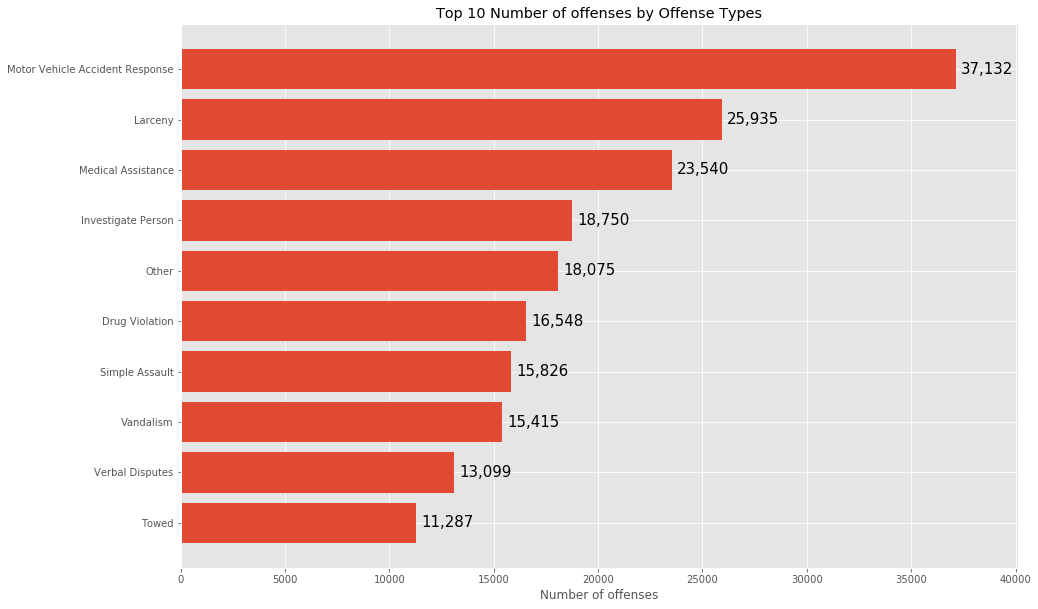

In [27]:
fig, ax = plt.subplots()
def plot_top10_groups(ax):
    crimes_per_offense = df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values(ascending=True)
    ax.barh(crimes_per_offense.index, crimes_per_offense)
    ax.set_title('Top 10 Number of offenses by Offense Types')
    ax.set_xlabel('Number of offenses');
    for patch in ax.patches:
        y = patch.get_y() + patch.get_height() / 2
        width = patch.get_width()
        ax.annotate(f"{width:,}", (width, y), xytext=(5, 0), textcoords='offset points', va='center', fontsize=15)
    ax.set_xlim(right=crimes_per_offense.max() * 1.08)
    return ax
plot_top10_groups(ax);

# Distribution of offences per day of week and hour of day

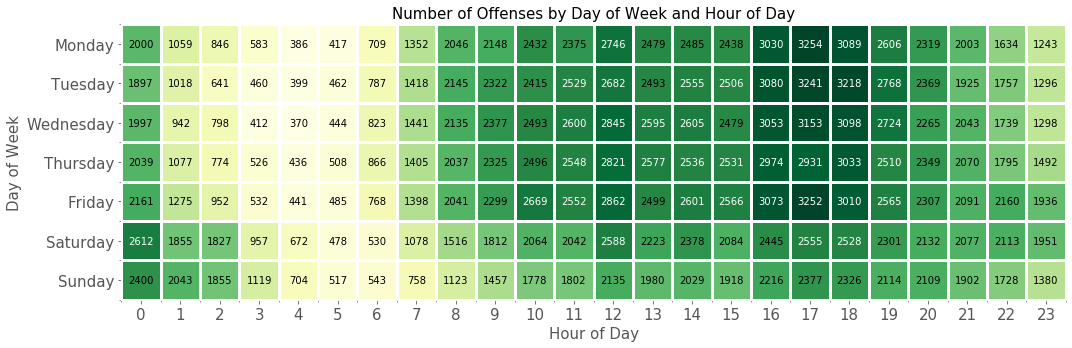

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

def plot_heatmap(ax):
    counts = pd.crosstab(df.DAY_OF_WEEK, df.HOUR)
    im = ax.imshow(counts, cmap="YlGn")
    ax.set_xticks(np.arange(len(counts.columns)))
    ax.set_yticks(np.arange(len(counts.index)))
    ax.set_xticklabels(counts.columns, fontsize=15)
    ax.set_yticklabels(counts.index, fontsize=15)
    for i in range(len(counts.index)):
        for j in range(len(counts.columns)):
            text = ax.text(j, i, counts.loc[i, j], ha="center", va="center", color="black" if counts.loc[i, j] < 2500 else "w")
    ax.set_xticks(np.arange(counts.shape[1] +1) - .5, minor=True)
    ax.set_yticks(np.arange(counts.shape[0] +1) - .5, minor=True)
    ax.grid(None)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.set_title('Number of Offenses by Day of Week and Hour of Day', fontsize=15)
    ax.set_ylabel('Day of Week', fontsize=15)
    ax.set_xlabel('Hour of Day', fontsize=15)
    fig.tight_layout()
    return ax
plot_heatmap(ax)

# BONUS: Seaborn heatmap

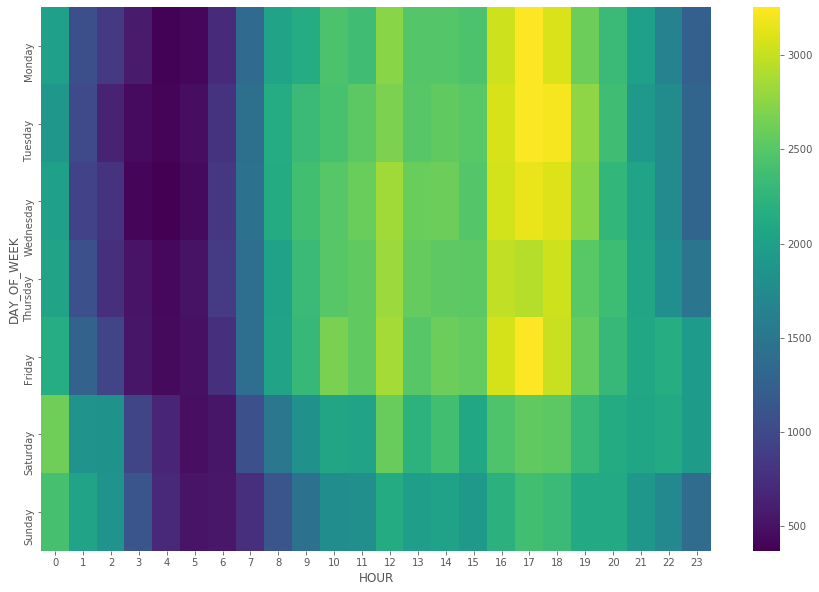

In [10]:
import seaborn as sns
sns.heatmap(pd.crosstab(df.DAY_OF_WEEK, df.HOUR), cmap='viridis')